# Project: Can you determine a hero's pickrate from non-unique datapoints

P - performance measure will be r2 score and mse <br>
E - environment  is data points pulled from season 4 of overwatch 2 of each hero <br>
A -  Actuator is the prediction of the pickrate of a given hero <br>
S - sensors are the factors given to the MLR agent (i.e; 'KDA Ratio', 'Win Rate, %', 'Eliminations / 10min', 'Objective Kills / 10min', 'Objective Time / 10min', 'Damage / 10min', 'Healing / 10min', 'Deaths / 10min') <br>



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:

class MLRAgent: 
    def __init__(self):
        self.df = pd.read_csv("ow2.csv")
        self.labels = list(self.df.keys())
        self.label_encoder = LabelEncoder()
        self.target = self.labels[3]
        self.features = [label for label in self.labels if label != self.target]
    
    
    def Clean(self): 

        df = self.df
        labels = self.labels
        clean_df = df[df["Skill Tier"] == "All"]  #returns the average hero stats of all skill tiers 
        clean_df = clean_df[labels[0:11]] # returns only the non unique hero stats
        for i in range(10):  # fills the NaN with 0 for easier processing
            clean_df[labels[i]] = clean_df[labels[i]].fillna(0)
        self.clean_df = clean_df
        self.clean_features = [label for label in list(self.clean_df.keys()) if label != self.target and label != "Skill Tier"]


    def Visualize(self): 
        df = self.clean_df
        features = self.clean_features
        for feature in features: 
            y = df[self.target]
            x = df[feature]
            plt.figure(figsize=(8, 6))
            plt.scatter(x, y, marker='o', color='red', alpha=0.5)
            plt.ylabel(self.target)
            plt.xlabel(feature)
            plt.title('Scatter Plot: ' + feature + ' vs. ' + self.target)
            plt.show()

    def Encoding(self): 
        # ecoding the name 
        df = self.clean_df 
        feature_list = self.clean_features
        df['Hero_encoded'] = self.label_encoder.fit_transform(df['Hero'])
        feature_list.remove('Hero')
        feature_list.append('Hero_encoded')
        print(feature_list)
        features_df = df[feature_list]
        #print(features_df.head())
        target_df = df[self.target]
        #print(target_df.head())

        x_train, x_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.1, random_state=42)
        
        self.encoded_df = df

        self.x_train = x_train
        self.y_train = y_train

        self.x_test = x_test
        self.y_test = y_test
    
    def Train(self): 
        MLR = LinearRegression()
        MLR.fit(self.x_train, self.y_train)
        self.mlr = MLR

        prediction = self.mlr.predict(self.x_test)
        self.test_prediction = prediction
    
    def Evaluate(self): 
        self.r2 = r2_score(self.y_test, self.test_prediction)
        self.mse = mean_squared_error(self.y_test, self.test_prediction)

        print(self.r2)
        print(self.mse)

        plt.figure(figsize=(12, 8))     
                    
        self.eval_df = pd.DataFrame({'Real pickrate': self.y_test, 'Predicted pickrate': self.test_prediction}) 
        self.eval_df.sort_index().plot()          
        plt.title("MLR Predicting pickrate")
        plt.xlabel('Evaluation number')
        plt.ylabel('pick rates')               
        plt.show()

In [7]:
agent = MLRAgent()

#Raw Dataset
print(agent.df.head(2))


  Hero Skill Tier  KDA Ratio  Pick Rate, %  Win Rate, %  Eliminations / 10min  \
0  Ana        All       4.23          9.57         49.3                  9.28   
1  Ana     Bronze       3.93          3.74         44.7                  8.66   

   Objective Kills / 10min  Objective Time / 10min  Damage / 10min  \
0                     3.86                      62            2636   
1                     3.86                      60            2586   

   Healing / 10min  ...  Jagged Blade Accuracy, %  Carnage Kills / 10min  \
0           8181.0  ...                       NaN                    NaN   
1           7135.0  ...                       NaN                    NaN   

   Wound Uptime, %  Rampage Kills / 10min  Focusing Beam Accuracy, %  \
0              NaN                    NaN                        NaN   
1              NaN                    NaN                        NaN   

   Focusing Beam Kills / 10min  Sticky Bomb Accuracy, %  \
0                          NaN          

In [8]:
# labels before cleaning
print(agent.labels)


['Hero', 'Skill Tier', 'KDA Ratio', 'Pick Rate, %', 'Win Rate, %', 'Eliminations / 10min', 'Objective Kills / 10min', 'Objective Time / 10min', 'Damage / 10min', 'Healing / 10min', 'Deaths / 10min', 'Scoped Accuracy, %', 'Biotic Grenade Kills / 10min', 'Enemies Slept / 10min', 'Healing Amplified / 10min', 'Nano Boost Assists / 10min', 'Blaster Kills / 10min', 'Damage Amplified / 10min', 'Players Resurrected / 10min', 'Final Blows / 10min', 'Solo Kills / 10min', 'Weapon Accuracy, %', 'Swift Strike Resets / 10min', 'Damage Reflected / 10min', 'Ultimates Reflected / 10min', 'Dragonblade Kills / 10min', 'Crit Accuracy, %', 'Deadeye Kills / 10min', 'Magnetic Grenade Attaches', 'Magnetic Grenade Kills / 10min', 'Kunai Kills / 10min', 'Effects Cleansed / 10min', 'Kitsune Rush Assists / 10min', 'Long Range Kills / 10min', 'Storm Arrow Kills / 10min', 'Recon Assists / 10min', 'Dragonstrike Kills / 10min', 'Secondary Accuracy, %', 'Biotic Orb Kills / 10min', 'Ally Coalescence Efficiency, %', 'En

In [9]:
#clean the data for processing
agent.Clean()

#Dataframe after cleaning
print(agent.clean_df.head())
print(agent.clean_df)



       Hero Skill Tier  KDA Ratio  Pick Rate, %  Win Rate, %  \
0       Ana        All       4.23          9.57        49.30   
8     Mercy        All       4.42          6.56        50.90   
16    Genji        All       2.50          3.45        49.28   
24  Cassidy        All       2.11          3.40        44.27   
32   Kiriko        All       4.63          5.87        46.06   

    Eliminations / 10min  Objective Kills / 10min  Objective Time / 10min  \
0                   9.28                     3.86                      62   
8                   1.80                     0.65                      51   
16                 18.30                     5.06                      64   
24                 16.94                     6.15                      50   
32                  8.16                     3.48                      70   

    Damage / 10min  Healing / 10min  Deaths / 10min  
0             2636           8181.0            5.95  
8              341           9096.0         

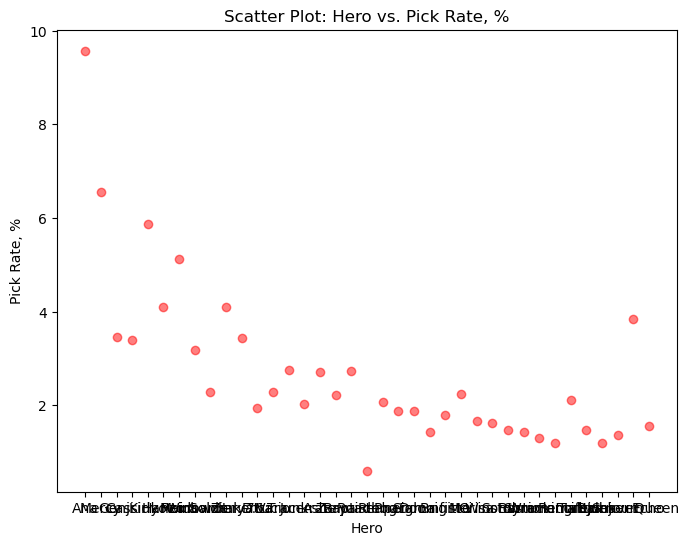

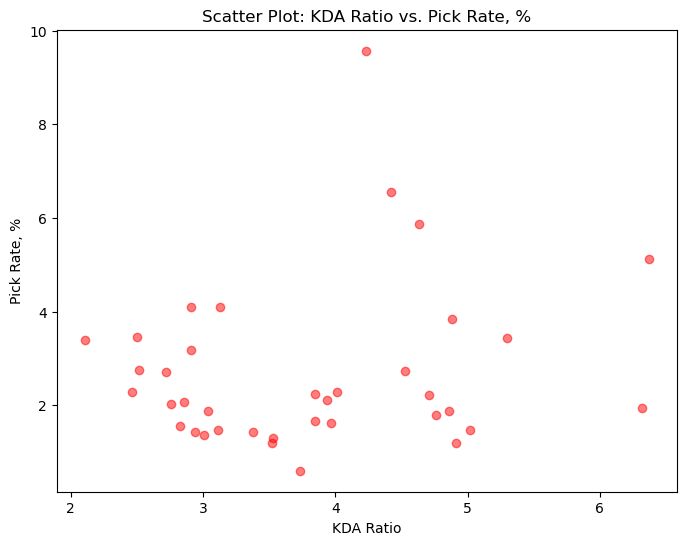

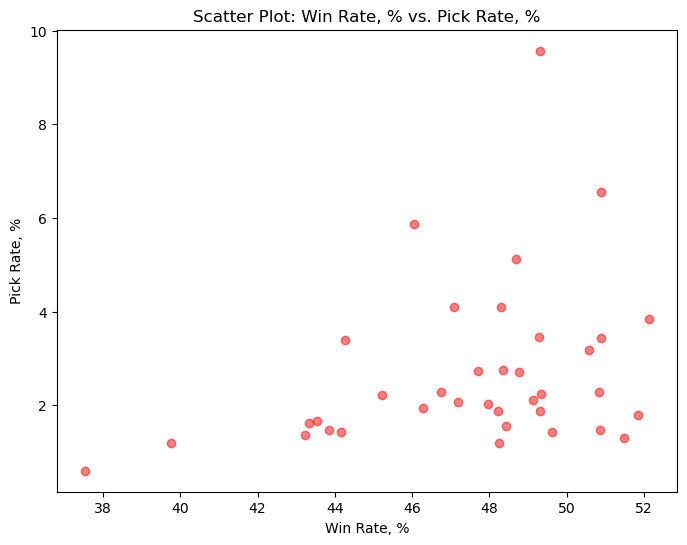

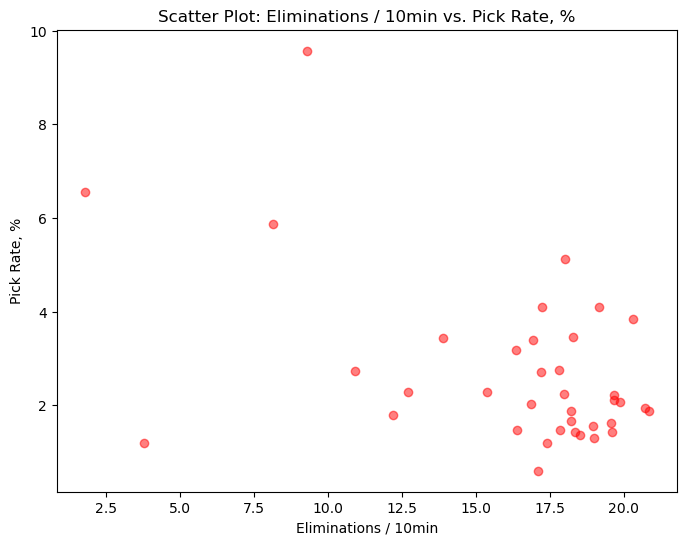

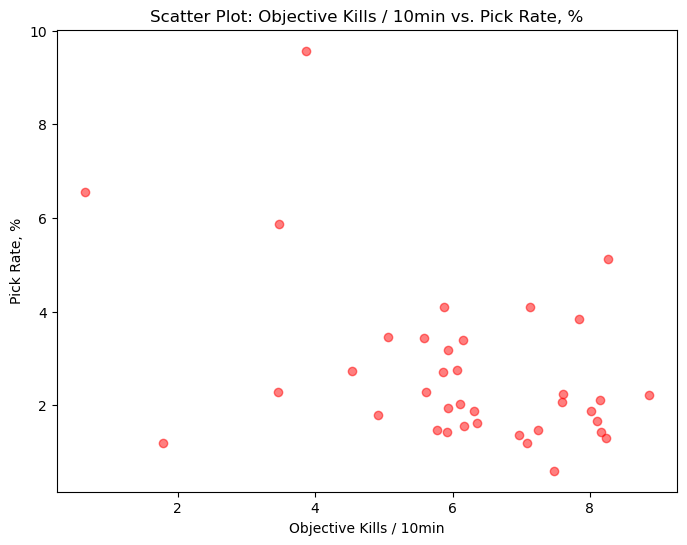

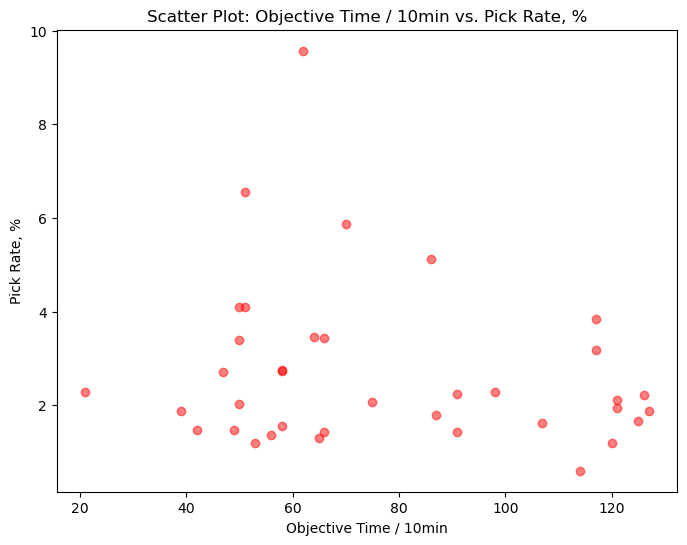

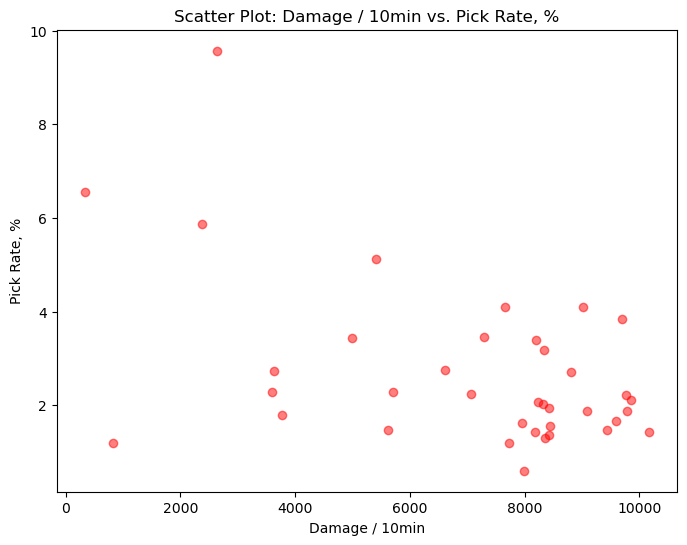

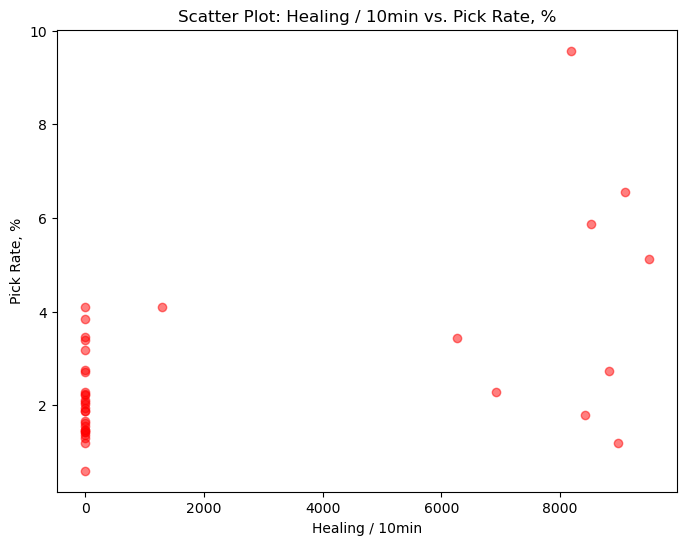

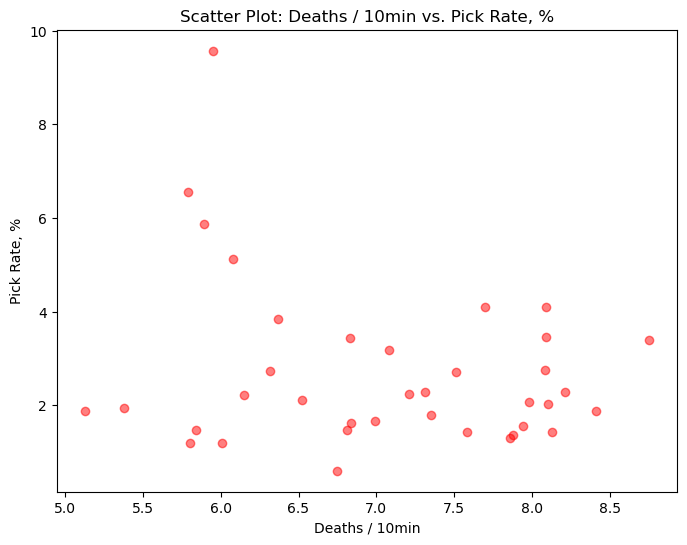

In [10]:
agent.Visualize()

In [11]:
#encoding proccess
agent.Encoding()



['KDA Ratio', 'Win Rate, %', 'Eliminations / 10min', 'Objective Kills / 10min', 'Objective Time / 10min', 'Damage / 10min', 'Healing / 10min', 'Deaths / 10min', 'Hero_encoded']


In [12]:
#training process
agent.Train()

0.14236898481763172
2.4019403832520343


<Figure size 1200x800 with 0 Axes>

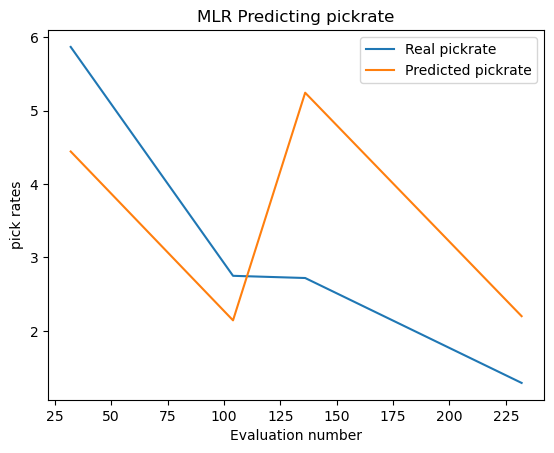

In [13]:
#Evaluation 
agent.Evaluate()

# final Results <br>
r2 score of 0.14 <br>
mse of 2.4 <br>

# Conclusion <br>
using only ['KDA Ratio', 'Win Rate, %', 'Eliminations / 10min', 'Objective Kills / 10min', 'Objective Time / 10min', 'Damage / 10min', 'Healing / 10min', 'Deaths / 10min'] for an MLR prediction will not give an accurate picture of a Hero's pickrate. <br>
